<a href="https://colab.research.google.com/github/tariqulq-cyber/Pemrosesan-teks-praktek/blob/main/ngram%20%26%20wordcloud/pemrosesan_teks_teori_n_gram_%26_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[INFO] Data dimuat. Total baris: 950

--- Menganalisis (2, 2)-gram (Top 950) ---
               Frekuensi
game nya              60
game ini              53
bisa login            49
tidak bisa            44
log in                40
...                  ...
aneh dh                2
terlalu ribet          2
terkena ban            2
tegas dalam            2
tapi tetep             2

[950 rows x 1 columns]
[SUKSES EKSPOR] Frekuensi Bi-gram disimpan ke bigram_frekuensi.csv

--- Menganalisis (3, 3)-gram (Top 950) ---
                  Frekuensi
tidak bisa login         20
to log in                16
gak bisa login           14
game nya bagus           14
login aja susah          14
...                     ...
always with the           1
always try login          1
always stuck on           1
always stuck in           1
always says ip            1

[950 rows x 1 columns]
[SUKSES EKSPOR] Frekuensi Tri-gram disimpan ke trigram_frekuensi.csv

--- Membuat Word Cloud ---
[SUKSES] Word Cloud disimpa

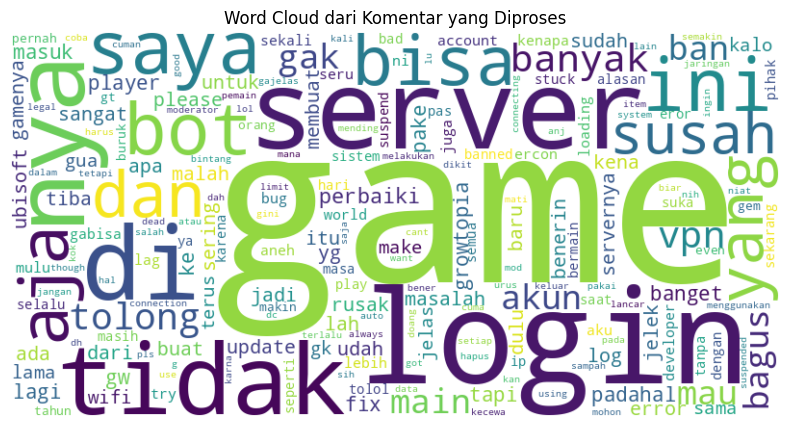


Proses Analisis Fitur Selesai.


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import sys
import os

# --- KONFIGURASI ---
NAMA_FILE_INPUT = '/content/drive/MyDrive/pemrosesan teks teori/preprocesing_growtopia.csv'
KOLOM_TEKS_BERSIH = 'content_processed'

# --- 1. MUAT DATA ---
try:
    df = pd.read_csv(NAMA_FILE_INPUT)
    print(f"[INFO] Data dimuat. Total baris: {len(df)}")

    # Pastikan kolom teks bersih ada dan tidak kosong
    if KOLOM_TEKS_BERSIH not in df.columns:
        print(f"[ERROR] Kolom '{KOLOM_TEKS_BERSIH}' tidak ditemukan. Mohon periksa nama kolom.")
        sys.exit(1)

    # Isi nilai hilang (NaN) dengan string kosong untuk menghindari error CountVectorizer
    df[KOLOM_TEKS_BERSIH] = df[KOLOM_TEKS_BERSIH].fillna('')

except Exception as e:
    print(f"[ERROR] Gagal memuat data: {e}")
    sys.exit(1)

# Gabungkan semua teks menjadi satu string besar untuk Word Cloud
semua_teks = " ".join(df[KOLOM_TEKS_BERSIH])


# =======================================================
# 2. GENERASI N-GRAM (Bi-gram dan Tri-gram)
# =======================================================

def generate_ngram_frequency(data_series, n_range, top_n=10):
    """Menghitung frekuensi N-gram (N=2 atau N=3) dari data teks."""
    print(f"\n--- Menganalisis {n_range}-gram (Top {top_n}) ---")

    # Inisialisasi CountVectorizer untuk N-gram tertentu
    vectorizer = CountVectorizer(ngram_range=n_range, max_features=1000)

    # Fit dan Transform data
    X = vectorizer.fit_transform(data_series)

    # Dapatkan nama fitur (N-gram)
    fitur_nama = vectorizer.get_feature_names_out()

    # Hitung frekuensi
    frekuensi = X.sum(axis=0)
    frekuensi_df = pd.DataFrame(frekuensi.T, index=fitur_nama, columns=['Frekuensi'])
    frekuensi_df = frekuensi_df.sort_values('Frekuensi', ascending=False)

    print(frekuensi_df.head(top_n))
    return frekuensi_df.head(top_n)

# --- A. Bi-gram (N=2) ---
# ngram_range=(2, 2) artinya hanya menghasilkan N-gram dengan panjang 2
bigram_freq_df = generate_ngram_frequency(df[KOLOM_TEKS_BERSIH], n_range=(2, 2), top_n=950)
# === TAMBAHKAN BARIS INI UNTUK EKSPOR BI-GRAM ===
bigram_freq_df.to_csv('bigram_frekuensi.csv', index=True, encoding='utf-8')
print("[SUKSES EKSPOR] Frekuensi Bi-gram disimpan ke bigram_frekuensi.csv")
# ===============================================

# --- B. Tri-gram (N=3) ---
# ngram_range=(3, 3) artinya hanya menghasilkan N-gram dengan panjang 3
trigram_freq_df = generate_ngram_frequency(df[KOLOM_TEKS_BERSIH], n_range=(3, 3), top_n=950)
# === TAMBAHKAN BARIS INI UNTUK EKSPOR TRI-GRAM ===
trigram_freq_df.to_csv('trigram_frekuensi.csv', index=True, encoding='utf-8')
print("[SUKSES EKSPOR] Frekuensi Tri-gram disimpan ke trigram_frekuensi.csv")
# =================================================


# =======================================================
# 3. GENERASI WORD CLOUD
# =======================================================

print("\n--- Membuat Word Cloud ---")

if semua_teks:
    # Menggunakan WordCloud untuk memvisualisasikan frekuensi Uni-gram
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False # Nonaktifkan deteksi bi-gram berulang pada wordcloud
    ).generate(semua_teks)

    # Menampilkan plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud dari Komentar yang Diproses')

    # Menyimpan gambar Word Cloud
    try:
        OUTPUT_PATH = 'wordcloud_komentar.png'
        plt.savefig(OUTPUT_PATH)
        print(f"[SUKSES] Word Cloud disimpan sebagai {os.path.abspath(OUTPUT_PATH)}")
        plt.show() # Tampilkan jendela Word Cloud
    except Exception as e:
        print(f"[ERROR] Gagal menyimpan atau menampilkan Word Cloud: {e}")

else:
    print("[PERINGATAN] Data teks kosong, Word Cloud tidak dapat dibuat.")

print("\nProses Analisis Fitur Selesai.")